In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from articulate import articulate
from omegaconf import OmegaConf
from dotenv import load_dotenv
from articulate_anything.utils.viz import (
    show_video, 
    display_code, 
    show_videos, 
    display_codes,
    show_images,
)
from articulate_anything.utils.utils import load_config, join_path
from articulate_anything.utils.cotracker_utils import make_cotracker
from PIL import Image
import json

/home/vlongle/miniconda3/envs/articulate-anything-release/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
pybullet build time: Nov 28 2023 23:52:03


In [3]:
import os
os.chdir("..")

In [4]:
API_KEY = "YOUR-ACTUAL-API-KEY"
## we have our API key stored in a .env file
load_dotenv()
API_KEY = os.environ.get('API_KEY')

In [5]:
modality = "partnet"
prompt = "35059"
joint_id = "joint_0"
out_dir = "results"

In [6]:
cfg = load_config()
cfg.prompt = prompt
cfg.additional_prompt = joint_id
cfg.modality = modality
cfg.out_dir = out_dir
cfg.api_key = API_KEY

cfg.model_name = "claude-3-5-sonnet-20241022"


cfg.cotracker.grid_size = 30
cfg.cotracker.mode = "offline"


cfg.actor_critic.max_iter = 2

cfg.joint_critic.examples_dir = "datasets/multi_modal_incontext_examples/joint_critic/in_context_examples_datasets" ## Put your examples here

cfg.simulator.ray_tracing = False

/home/vlongle/miniconda3/envs/articulate-anything-release/lib/python3.9/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'config': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [7]:
cfg.cotracker

{'mode': 'offline', 'checkpoint_path': '../co-tracker/checkpoints/cotracker2.pth', 'grid_size': 30, 'render_all': False, 'displacement_threshold': None, 'max_moving_points': None, 'linewidth': 5, 'overwrite': True}

In [8]:
use_cotracker = True
cfg.joint_actor.use_cotracker = use_cotracker
cfg.joint_critic.use_cotracker = use_cotracker
cfg.cotracker.checkpoint_path = "../co-tracker/checkpoints/cotracker2.pth" ## set it to your correct path

In [9]:
steps = articulate(cfg)

INFO:root:Setting seed 0
INFO:root:Starting Mesh Retrieval
INFO:root:Starting Link Articulation
pybullet build time: Nov 28 2023 23:52:03
[2024-12-19 19:24:02.657] [svulkan2] [error] GLFW error: X11: The DISPLAY environment variable is missing
[2024-12-19 19:24:02.657] [svulkan2] [warning] Continue without GLFW.

INFO:root:Processing datasets/partnet-mobility-v0/dataset/35059/mobility.urdf
INFO:root:LinkPlacementActor: Generating content.


[2024-12-19 19:24:02,657][root][INFO] - >>>> Generating a stationary of joint: all | file: datasets/partnet-mobility-v0/dataset/35059/mobility.urdf



INFO:root:Prompt: ['The groundtruth image is shown below\n', <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x480 at 0x7F0E0411E100>, 'Link summary is \n\nobject_id: 35059\n\nRobot Link Summary:\n\n - base\n - door\n - furniture_body\n']
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"


>>> USAGE Usage(input_tokens=5067, output_tokens=258, cache_creation_input_tokens=0, cache_read_input_tokens=0)


pybullet build time: Nov 28 2023 23:52:03
[2024-12-19 19:24:12.090] [svulkan2] [error] GLFW error: X11: The DISPLAY environment variable is missing
[2024-12-19 19:24:12.090] [svulkan2] [warning] Continue without GLFW.

INFO:root:GT link diff is {'position_diff': {'furniture_body': 0.0, 'door': 0.0019999999999988916}, 'orientation_diff': {'furniture_body': 0.0, 'door': 0.0}}
INFO:root:LinkCritic: Generating content.
INFO:root:Prompt: ['The candidate function is:\n```python\nfrom articulate_anything.api.odio_urdf import *\n\ndef partnet_35059(input_dir, links) -> Robot:\n    pred_robot = Robot(input_dir=input_dir, name="cabinet")\n    pred_robot.add_link(links[\'base\'])\n    \n    # Add the main furniture body and attach it to base\n    pred_robot.add_link(links[\'furniture_body\'])\n    pred_robot.add_joint(\n        Joint("base_to_furniture_body",\n              Parent("base"),\n              Child("furniture_body"),\n              type="fixed")\n    )\n    \n    # Add the door in fro

>>> USAGE Usage(input_tokens=5813, output_tokens=64, cache_creation_input_tokens=0, cache_read_input_tokens=0)
No. of link steps: 1
Picking the last link step
Link placement path: results/35059/link_placement/iter_0/seed_0/link_placement.py


pybullet build time: Nov 28 2023 23:52:03
[2024-12-19 19:24:19.504] [svulkan2] [error] GLFW error: X11: The DISPLAY environment variable is missing
[2024-12-19 19:24:19.504] [svulkan2] [warning] Continue without GLFW.

pybullet build time: Nov 28 2023 23:52:03
[2024-12-19 19:24:24.141] [svulkan2] [error] GLFW error: X11: The DISPLAY environment variable is missing
[2024-12-19 19:24:24.141] [svulkan2] [warning] Continue without GLFW.

/home/vlongle/miniconda3/envs/articulate-anything-release/lib/python3.9/site-packages/cotracker/models/build_cotracker.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This 

Video saved to ./datasets/partnet-mobility-v0/dataset/35059/aug_video_joint_0_frontview.mp4


INFO:root:JointPredictionActor: Generating content.
INFO:root:Prompt: ['The groundtruth video is\n', <PIL.Image.Image image mode=RGB size=640x480 at 0x7F0E03F56460>, <PIL.Image.Image image mode=RGB size=640x480 at 0x7F0E040540A0>, <PIL.Image.Image image mode=RGB size=640x488 at 0x7F0E040540D0>, <PIL.Image.Image image mode=RGB size=640x488 at 0x7F0E04054100>, <PIL.Image.Image image mode=RGB size=738x488 at 0x7F0E04054130>, 'The targetted affordance is\n`door`', 'The link placement code is\n```python\nfrom articulate_anything.api.odio_urdf import *\n\ndef partnet_35059(input_dir, links) -> Robot:\n    pred_robot = Robot(input_dir=input_dir, name="cabinet")\n    pred_robot.add_link(links[\'base\'])\n    \n    # Add the main furniture body and attach it to base\n    pred_robot.add_link(links[\'furniture_body\'])\n    pred_robot.add_joint(\n        Joint("base_to_furniture_body",\n              Parent("base"),\n              Child("furniture_body"),\n              type="fixed")\n    )\n    

>>> USAGE Usage(input_tokens=17866, output_tokens=654, cache_creation_input_tokens=0, cache_read_input_tokens=0)


pybullet build time: Nov 28 2023 23:52:03
[2024-12-19 19:24:49.905] [svulkan2] [error] GLFW error: X11: The DISPLAY environment variable is missing
[2024-12-19 19:24:49.905] [svulkan2] [warning] Continue without GLFW.

/home/vlongle/miniconda3/envs/articulate-anything-release/lib/python3.9/site-packages/cotracker/models/build_cotracker.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_

Video saved to ./results/35059/joint_actor/iter_0/seed_0/aug_video_furniture_body_to_door_frontview.mp4


INFO:root:GT joint diff is {'joint_type': True, 'joint_origin': {'xyz': 2.6024160886206626e-05, 'orientation': 0.0}, 'joint_axis': 0.0, 'joint_limit': {'direction_diff': 0.0, 'range_diff': 1.2566370614359168}}
INFO:root:JointCriticMultiModalExamples: Generating content.
INFO:root:Prompt: ['Here are some examples. Study each of these examples carefully:\n', '## Example 1:\n', 'The groundtruth video is:\n', <PIL.Image.Image image mode=RGB size=640x480 at 0x7F0E03AFBF40>, <PIL.Image.Image image mode=RGB size=640x480 at 0x7F0E03AFBFD0>, <PIL.Image.Image image mode=RGB size=640x480 at 0x7F0E03AFBFA0>, <PIL.Image.Image image mode=RGB size=640x480 at 0x7F0E03AFBE80>, <PIL.Image.Image image mode=RGB size=640x480 at 0x7F0E03AFBD60>, 'The prediction video is:\n', <PIL.Image.Image image mode=RGB size=640x480 at 0x7F0E03AFB250>, <PIL.Image.Image image mode=RGB size=640x480 at 0x7F0E03AFB2B0>, <PIL.Image.Image image mode=RGB size=640x480 at 0x7F0E03AFB2E0>, <PIL.Image.Image image mode=RGB size=640x

>>> USAGE Usage(input_tokens=41528, output_tokens=199, cache_creation_input_tokens=0, cache_read_input_tokens=0)


INFO:root:At iteration 0, seed 0, Best result so far {'iteration': 0, 'seed': 0, 'candidate_function_path': 'results/35059/joint_actor/iter_0/seed_0/joint_pred.py', 'pred_video_path': 'results/35059/joint_actor/iter_0/seed_0/aug_video_furniture_body_to_door_frontview.mp4', 'feedback_score': 10, 'feedback': '{\n    "gt_description": "The motion trace shows the door opens by rotating forward along the vertical axis (z) while the left part fixed to the body. The arc motion indicates this is a revolute joint.",\n    "pred_description": "The motion trace shows the door opens by rotating forward along the vertical axis (z) while the left part fixed to the body. The arc motion matches the groundtruth.",\n    "candidate_function_description": "The `candidate_function` has `make_revolute_joint` and axis is [0, 0, -1], which is vertical (z-axis) and correct. The pivot point is set to Back-Left-Bottom which correctly keeps the left part fixed to the body.",\n    "failure_reason": "success",\n    

## Link Placement

In [10]:
link_art = steps["Link Articulation"]
link_actors = link_art["Link actor"]
link_critics = link_art["Link critic"]
assert len(link_actors) == len(link_critics)
print(f"Link placement runs for {len(link_actors)} iteration(s)")

Link placement runs for 1 iteration(s)


In [11]:
link_feedbacks = [json.dumps(link_critic.load_prediction(),
                             indent=4) for link_critic in link_critics]

link_codes = [link_actor.load_prediction() for link_actor in link_actors]

link_preds = [link_actor.load_predicted_rendering() for link_actor in link_actors]

Here's the code to place the links in the 3D space

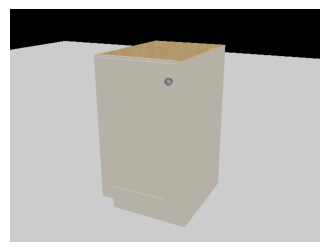

╷  
                                                            │  
╶───────────────────────────────────────────────────────────┼─╴
 from articulate_anything.api.odio_urdf import *            │  
                                                            │  
 def partnet_35059(input_dir, links) -> Robot:              │  
     pred_robot = Robot(input_dir=input_dir, name="cabinet")│  
     pred_robot.add_link(links['base'])                     │  
                                                            │  
     # Add the main furniture body and attach it to base    │  
     pred_robot.add_link(links['furniture_body'])           │  
     pred_robot.add_joint(                                  │  
         Joint("base_to_furniture_body",                    │  
               Parent("base"),                              │  
               Child("furniture_body"),                     │  
               type="fixed")                                │  
     )                                                      │  
                                                            │  
     # Add the door in front of the furniture body          │  
     pred_robot.add_link(links['door'])                     │  
     pred_robot.place_relative_to('door', 'furniture_body', │  
                                placement="front",          │  
                                clearance=0.0)              │  
                                                            │  
     return pred_robot                                      │  
                                                            ╵

╷ 
                                                                                                                │ 
╶───────────────────────────────────────────────────────────────────────────────────────────────────────────────┼╴
 {                                                                                                              │ 
     "realism_rating": "10",                                                                                    │ 
     "description": "The prediction is visually identical to the groundtruth. The cabinet appears to have the s…│ 
 }                                                                                                              │ 
                                                                                                                ╵

In [12]:
show_images(link_preds)
display_codes(link_codes)
display_codes(link_feedbacks)

Let's see what our own critic has to say about the link placement

## Joint Prediction

In [13]:
joint_art = steps["Joint Articulation"]
joint_actors = joint_art["Joint actor"]
joint_critics = joint_art["Joint critic"]


assert len(joint_actors) == len(joint_critics)
print(f"Joint prediction runs for {len(joint_actors)} iteration(s)")

Joint prediction runs for 1 iteration(s)


In [14]:
joint_codes = [joint_actor.load_prediction() for joint_actor in joint_actors]
joint_preds = [joint_actor.load_predicted_rendering() for joint_actor in joint_actors]
joint_feedbacks = [json.dumps(joint_critic.load_prediction(),
                             indent=4) for joint_critic in joint_critics]

/home/vlongle/miniconda3/envs/articulate-anything-release/lib/python3.9/site-packages/cotracker/models/build_cotracker.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  s

Video saved to ./results/35059/joint_actor/iter_0/seed_0/aug_video_furniture_body_to_door_frontview.mp4


""

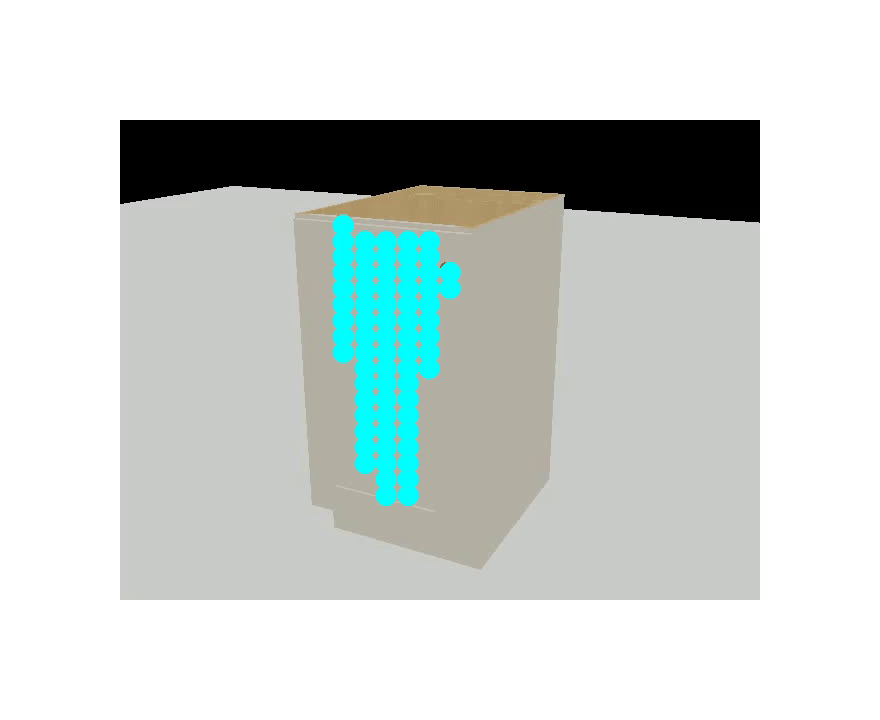

╷  
                                                                                      │  
╶─────────────────────────────────────────────────────────────────────────────────────┼─╴
 from articulate_anything.api.odio_urdf import *                                      │  
                                                                                      │  
 def partnet_35059(input_dir, links) -> Robot:                                        │  
     """                                                                              │  
     No. masked_links: 3                                                              │  
     Robot Link Summary:                                                              │  
     - base                                                                           │  
     - door                                                                           │  
     - furniture_body                                                                 │  
                                                                                      │  
     Object: a cabinet with a door                                                    │  
     Targetted affordance: "door"                                                     │  
     """                                                                              │  
     pred_robot = Robot(input_dir=input_dir, name="cabinet")                          │  
     pred_robot.add_link(links['base'])                                               │  
                                                                                      │  
     # Add the main furniture body and attach it to base                              │  
     pred_robot.add_link(links['furniture_body'])                                     │  
     pred_robot.add_joint(                                                            │  
         Joint("base_to_furniture_body",                                              │  
               Parent("base"),                                                        │  
               Child("furniture_body"),                                               │  
               type="fixed")                                                          │  
     )                                                                                │  
                                                                                      │  
     # Add the door in front of the furniture body                                    │  
     pred_robot.add_link(links['door'])                                               │  
     pred_robot.place_relative_to('door', 'furniture_body',                           │  
                                placement="front",                                    │  
                                clearance=0.0)                                        │  
                                                                                      │  
     # ====================JOINT PREDICTION====================                       │  
     # -- Groundtruth video analysis --                                               │  
     # in the groundtruth video, the door opens up while its left part still          │  
     # attached to the body so the pivot point needs to be Back-Left-Bottom (BLB)     │  
     # or Back-Left-Top (BLT)                                                         │  
     door_bb = pred_robot.get_bounding_boxes(['door'], include_dim=False)['door']     │  
     door_vertices = compute_aabb_vertices(*door_bb)                                  │  
     pivot_point = door_vertices[0]  # Back-Left-Bottom (BLB)                         │  
                                                                                      │  
     pred_robot.make_revolute_joint(                                                  │  
         "door",                                                                      │  
         "furniture_body",          

╷ 
                                                                                                                │ 
╶───────────────────────────────────────────────────────────────────────────────────────────────────────────────┼╴
 {                                                                                                              │ 
     "gt_description": "The motion trace shows the door opens by rotating forward along the vertical axis (z) w…│ 
     "pred_description": "The motion trace shows the door opens by rotating forward along the vertical axis (z)…│ 
     "candidate_function_description": "The `candidate_function` has `make_revolute_joint` and axis is [0, 0, -…│ 
     "failure_reason": "success",                                                                               │ 
     "improvement_suggestion": "None",                                                                          │ 
     "realism_rating": 10                                                                                       │ 
 }                                                                                                              │ 
                                                                                                                ╵

In [15]:
show_videos(joint_preds, width=512, height=512)
display_codes(joint_codes)
display_codes(joint_feedbacks)